In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cyber-security-attacks/README.md
/kaggle/input/cyber-security-attacks/cybersecurity_attacks.csv


In [2]:
data = pd.read_csv("/kaggle/input/cyber-security-attacks/cybersecurity_attacks.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [4]:
data.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


In [5]:
data.tail()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
39995,2023-05-26 14:08:42,26.36.109.26,121.100.75.240,31005,6764,UDP,1428,Control,HTTP,Quibusdam ullam consequatur consequuntur accus...,...,Logged,Medium,Adira Madan,Mozilla/5.0 (iPad; CPU iPad OS 14_2_1 like Mac...,Segment A,"Nashik, Manipur",NaN,Log Data,Alert Data,Firewall
39996,2023-03-27 00:38:27,17.21.163.81,196.108.134.78,2553,28091,UDP,1184,Control,HTTP,Quaerat neque esse. Animi expedita natus commo...,...,Logged,High,Rati Dara,Mozilla/5.0 (Windows; U; Windows 98; Win 9x 4....,Segment C,"Vadodara, Mizoram",60.51.30.46,Log Data,NaN,Firewall
39997,2022-03-31 01:45:49,162.35.217.57,98.107.0.15,22505,25152,UDP,1043,Data,DNS,Enim at aspernatur illum. Saepe numquam eligen...,...,Blocked,Low,Samiha Joshi,Mozilla/5.0 (Windows; U; Windows NT 4.0) Apple...,Segment C,"Mahbubnagar, Himachal Pradesh",NaN,Log Data,Alert Data,Server
39998,2023-09-22 18:32:38,208.72.233.205,173.79.112.252,20013,2703,UDP,483,Data,FTP,Officiis dolorem sed harum provident earum dis...,...,Ignored,Low,Rasha Chauhan,Mozilla/5.0 (X11; Linux i686) AppleWebKit/536....,Segment B,"Rourkela, Arunachal Pradesh",137.76.130.8,Log Data,NaN,Server
39999,2023-10-10 11:59:52,14.102.21.108,109.198.45.7,50137,55575,ICMP,1175,Control,HTTP,Eligendi omnis voluptate nihil voluptatibus do...,...,Logged,Medium,Zaina Kumar,Mozilla/5.0 (iPod; U; CPU iPhone OS 3_0 like M...,Segment A,"Pudukkottai, West Bengal",112.169.115.139,Log Data,Alert Data,Firewall


In [6]:
data.shape

(40000, 25)

In [7]:
print(f"there are {data.shape[0]} data in the dataset.")
data.isnull().sum()

there are 40000 data in the dataset.


Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

we already have some null data

In [8]:
data.nunique()

Timestamp                 39997
Source IP Address         40000
Destination IP Address    40000
Source Port               29761
Destination Port          29895
Protocol                      3
Packet Length              1437
Packet Type                   2
Traffic Type                  3
Payload Data              40000
Malware Indicators            1
Anomaly Scores             9826
Alerts/Warnings               1
Attack Type                   3
Attack Signature              2
Action Taken                  3
Severity Level                3
User Information          32389
Device Information        32104
Network Segment               3
Geo-location Data          8723
Proxy Information         20148
Firewall Logs                 1
IDS/IPS Alerts                1
Log Source                    2
dtype: int64

In [9]:
def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.

    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    Returns:
        df_missing (pd.DataFrame): Processed DataFrame object.

    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan

    return df_missing

In [10]:
new_df = add_random_missing_values(data)

In [11]:
new_df.isnull().sum()

Timestamp                  2030
Source IP Address          1959
Destination IP Address     1945
Source Port                2022
Destination Port           1910
Protocol                   1924
Packet Length              1918
Packet Type                1942
Traffic Type               2037
Payload Data               1920
Malware Indicators        20958
Anomaly Scores             1889
Alerts/Warnings           21093
Attack Type                1947
Attack Signature           2048
Action Taken               1889
Severity Level             1912
User Information           1871
Device Information         1934
Network Segment            1915
Geo-location Data          1976
Proxy Information         20831
Firewall Logs             20991
IDS/IPS Alerts            21008
Log Source                 1989
dtype: int64

In [12]:
new_df.nunique()

Timestamp                 37968
Source IP Address         38041
Destination IP Address    38055
Source Port               28678
Destination Port          28849
Protocol                      3
Packet Length              1437
Packet Type                   2
Traffic Type                  3
Payload Data              38080
Malware Indicators            1
Anomaly Scores             9766
Alerts/Warnings               1
Attack Type                   3
Attack Signature              2
Action Taken                  3
Severity Level                3
User Information          31146
Device Information        30602
Network Segment               3
Geo-location Data          8700
Proxy Information         19168
Firewall Logs                 1
IDS/IPS Alerts                1
Log Source                    2
dtype: int64

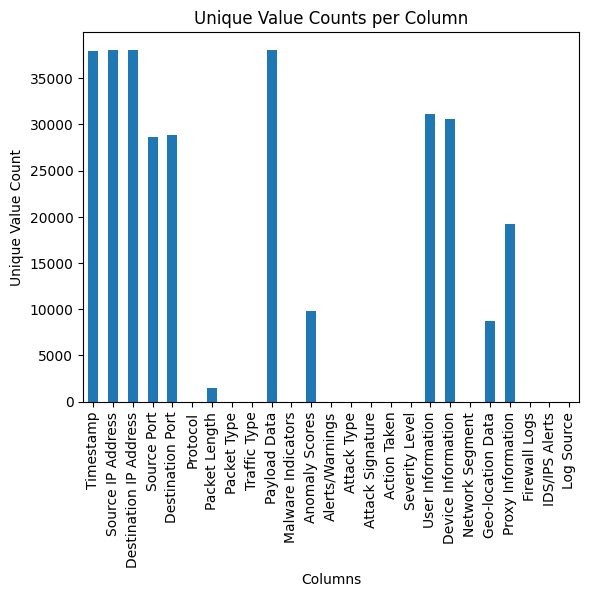

In [13]:
unique_counts = new_df.nunique()

# Bar grafik oluşturma
unique_counts.plot(kind='bar')
plt.title('Unique Value Counts per Column')
plt.xlabel('Columns')
plt.ylabel('Unique Value Count')
plt.xticks(rotation=90)  # X eksenindeki sütun adlarını daha okunabilir hale getirir
plt.show()

In [14]:
bottom = 1000
top = 10000
most_unique = {}
last_unique = {}
average_unique = {}
for col, count in zip(new_df.columns ,unique_counts):
    if count < bottom:
        last_unique.update({col:count})
    elif (bottom < count) and (count < top):
        average_unique.update({col:count})
    else:
        most_unique.update({col:count})

print(last_unique.keys())
print()
print(average_unique.keys())
print()
print(most_unique.keys())

dict_keys(['Protocol', 'Packet Type', 'Traffic Type', 'Malware Indicators', 'Alerts/Warnings', 'Attack Type', 'Attack Signature', 'Action Taken', 'Severity Level', 'Network Segment', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'])

dict_keys(['Packet Length', 'Anomaly Scores', 'Geo-location Data'])

dict_keys(['Timestamp', 'Source IP Address', 'Destination IP Address', 'Source Port', 'Destination Port', 'Payload Data', 'User Information', 'Device Information', 'Proxy Information'])


In [15]:
last_unique_values = {}
for column in last_unique.keys():
    last_unique_values.update({column: data[column].unique().tolist()})
for item in last_unique_values:
    print(item.ljust(20), ":", last_unique_values[item])

Protocol             : ['ICMP', 'UDP', 'TCP']
Packet Type          : ['Data', 'Control']
Traffic Type         : ['HTTP', 'DNS', 'FTP']
Malware Indicators   : ['IoC Detected', nan]
Alerts/Warnings      : [nan, 'Alert Triggered']
Attack Type          : ['Malware', 'DDoS', 'Intrusion']
Attack Signature     : ['Known Pattern B', 'Known Pattern A']
Action Taken         : ['Logged', 'Blocked', 'Ignored']
Severity Level       : ['Low', 'Medium', 'High']
Network Segment      : ['Segment A', 'Segment B', 'Segment C']
Firewall Logs        : ['Log Data', nan]
IDS/IPS Alerts       : [nan, 'Alert Data']
Log Source           : ['Server', 'Firewall']


In [16]:
for column, values in (average_unique.items()):
    print(column.ljust(20), ":", values)
    print(new_df[column].head())
    print()

Packet Length        : 1437
0     503.0
1    1174.0
2     306.0
3     385.0
4    1462.0
Name: Packet Length, dtype: float64

Anomaly Scores       : 9766
0    28.67
1    51.50
2      NaN
3    15.79
4     0.52
Name: Anomaly Scores, dtype: float64

Geo-location Data    : 8700
0    Jamshedpur, Sikkim
1    Bilaspur, Nagaland
2     Bokaro, Rajasthan
3    Jaunpur, Rajasthan
4    Anantapur, Tripura
Name: Geo-location Data, dtype: object



In [17]:
encoder = LabelEncoder()
new_df['Geo-location Data'] = encoder.fit_transform(new_df['Geo-location Data'])

Geo_Location_Data_dict = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

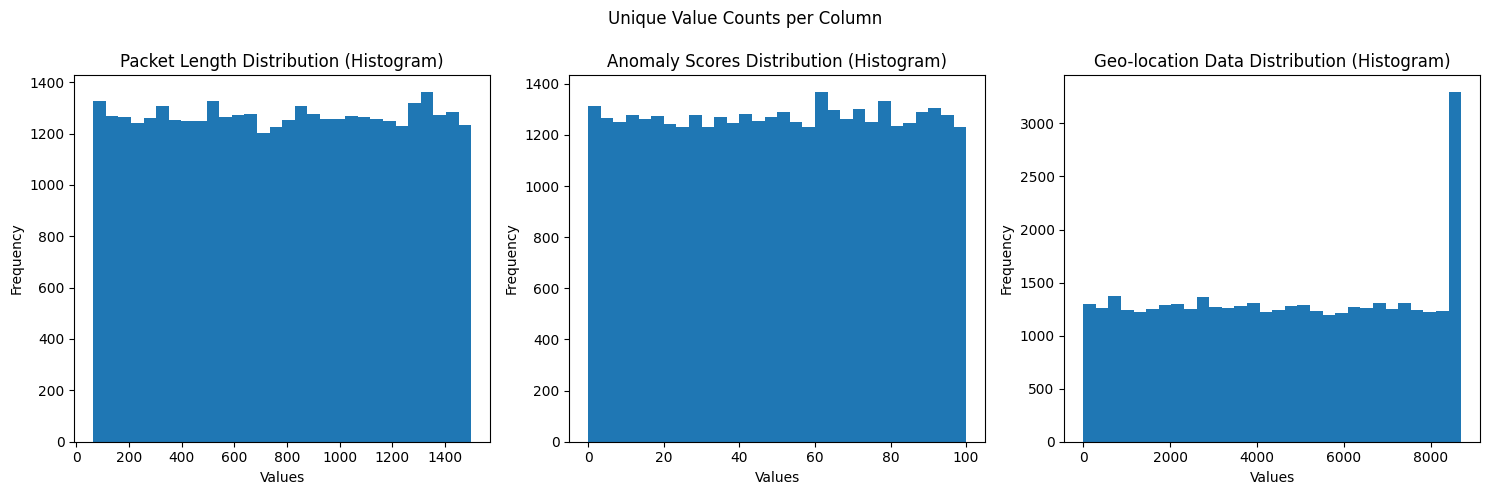

In [18]:
# Subplots ile üç grafiği aynı figürde yerleştirme
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  
fig.suptitle('Unique Value Counts per Column')

for idx, column in enumerate(average_unique.keys()):
    
    axes[idx].hist(new_df[column], bins=30)
    axes[idx].set_title(f'{column} Distribution (Histogram)')
    axes[idx].set_xlabel('Values')
    axes[idx].set_ylabel('Frequency')

# Grafikleri gösterme
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Başlık için alan bırakmak
plt.show()


In [19]:
for column, values in (most_unique.items()):
    print(column.ljust(20), ":", values)
    print(new_df[column].head())
    print()

Timestamp            : 37968
0    2023-05-30 06:33:58
1    2020-08-26 07:08:30
2    2022-11-13 08:23:25
3    2023-07-02 10:38:46
4    2023-07-16 13:11:07
Name: Timestamp, dtype: object

Source IP Address    : 38041
0     103.216.15.12
1    78.199.217.198
2      63.79.210.48
3     163.42.196.10
4     71.166.185.76
Name: Source IP Address, dtype: object

Destination IP Address : 38055
0       84.9.164.252
1     66.191.137.154
2      198.219.82.17
3    101.228.192.255
4    189.243.174.238
Name: Destination IP Address, dtype: object

Source Port          : 28678
0    31225.0
1    17245.0
2    16811.0
3    20018.0
4     6131.0
Name: Source Port, dtype: float64

Destination Port     : 28849
0    17616.0
1    48166.0
2    53600.0
3    32534.0
4    26646.0
Name: Destination Port, dtype: float64

Payload Data         : 38080
0                                                  NaN
1    Aperiam quos modi officiis veritatis rem. Omni...
2    Perferendis sapiente vitae soluta. Hic delectu...
3    To

In [20]:
print("Most frequent top 3:")
for column, values in (most_unique.items()):
    print(new_df[column].value_counts().head(3))
    print(f"{column.ljust(15)} {values}")
    print()

Most frequent top 3:
Timestamp
2022-06-11 14:28:15    2
2022-06-06 12:12:43    2
2023-05-30 06:33:58    1
Name: count, dtype: int64
Timestamp       37968

Source IP Address
103.216.15.12    1
211.71.225.60    1
59.165.62.69     1
Name: count, dtype: int64
Source IP Address 38041

Destination IP Address
84.9.164.252      1
109.112.236.24    1
48.157.39.218     1
Name: count, dtype: int64
Destination IP Address 38055

Source Port
31656.0    5
35304.0    5
15669.0    5
Name: count, dtype: int64
Source Port     28678

Destination Port
7508.0     6
17896.0    5
57508.0    5
Name: count, dtype: int64
Destination Port 28849

Payload Data
Aperiam quos modi officiis veritatis rem. Omnis nulla dolore perspiciatis.\nIllo animi mollitia vero voluptates error ad. Quidem maxime eaque optio a. Consectetur quasi veniam et totam culpa ullam.    1
Tempora consequuntur aliquam harum adipisci. Nesciunt eligendi sunt rerum et voluptatum expedita. Placeat ipsa blanditiis inventore praesentium minima quo dol